In [3]:
# load libraries
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from scipy.io import loadmat

%matplotlib inline  
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [4]:
#load data
data = loadmat('./data/ex3data1.mat')
X,y=data['X'],data['y']
weights = loadmat('data/ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']
print(data.keys())
print(weights.keys())

dict_keys(['__version__', 'X', '__globals__', '__header__', 'y'])
dict_keys(['__version__', 'Theta1', '__globals__', '__header__', 'Theta2'])


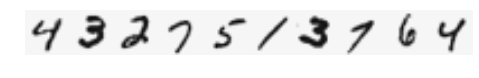

In [5]:
# show the digits
# get 10 random samples
sample=np.random.choice(X.shape[0],10)
plt.imshow(X[sample].reshape(-1,20).T)
plt.axis('off');

In [6]:
# cost function
def costFunction(theta,reg,X,y):
    m=np.size(y)
    h=sp.special.expit(X.dot(theta))
    J=-(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))+reg/m/2*np.sum(np.square(theta[1:]))
    if np.isnan(J[0]):
        return(np.inf)
    return(J)

In [113]:
# gradient function
def gradFunction(theta,reg,X,y):
    m=np.size(y)
    h=sp.special.expit(X.dot(theta.reshape(-1,1)))    
    grad=(1/m)*X.T.dot(h-y)+(1/m)*reg*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return(grad.flatten())

In [107]:
# predict function
def predict(theta,X):
    h=sp.special.expit(X.dot(theta))
    return(h)

In [108]:
# extend 1 for X
X_ext=np.c_[np.ones(np.shape(y)),X]
y=np.c_[y]
# turn 10 to 0
y[y==10]=0

In [109]:
# train each classifier
def oneVsAll(K,reg,initial_theta,X,y):
    meta_theta=np.zeros((K,X.shape[1]))
    for k in range(K):
        y_act = (y == k)*1
        #run optimize
        res = sp.optimize.minimize(costFunction,initial_theta,args=(reg,X,y_act),
                                   jac=gradFunction,method=None,options={'maxiter':50})
        meta_theta[k]=res.x        
    return(meta_theta)

In [114]:
# do training
reg = 0.1
K = 10
initial_theta=np.zeros((X_ext.shape[1],1))
meta_theta=oneVsAll(K,reg,initial_theta,X_ext,y)

In [94]:
# a meta prediction function to get the number
def metaPredict(meta_theta,X):
    meta_result=np.zeros((np.shape(X)[0],K))
    for k in range(K):
        meta_result[:,k]=predict(meta_theta[k],X)
    #calculate accuracy
    return(np.c_[np.argmax(meta_result,axis=1)])

In [95]:
y_pre=metaPredict(meta_theta,X_ext)
accuracy_sep=np.zeros(K)
for k in range(K):
    y_sel=y[y==k]
    y_pre_sel=y_pre[y==k]
    accuracy_sep[k]=100*np.sum((y_pre_sel==y_sel).astype(int))/np.size(y_sel)
    print('Accuracy = \n',k,accuracy_sep[k])
print(100*np.sum(y_pre==y)*1/np.size(y))

Accuracy = 
 0 99.2
Accuracy = 
 1 97.2
Accuracy = 
 2 89.6
Accuracy = 
 3 91.0
Accuracy = 
 4 94.0
Accuracy = 
 5 88.6
Accuracy = 
 6 96.6
Accuracy = 
 7 93.8
Accuracy = 
 8 91.0
Accuracy = 
 9 90.8
93.18


[[4 1 6 6 7 5 7 5 6 6]]
[[4 1 6 6 7 3 9 8 6 6]]


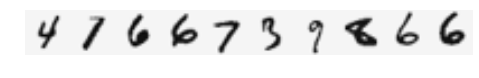

In [96]:
# plot
# show the digits and compare with our prediction
# get 10 random samples
sample=np.random.choice(X.shape[0],10)
plt.imshow(X[sample].reshape(-1,20).T)
plt.axis('off');
print(y_pre[sample].T)
print(y[sample].T)

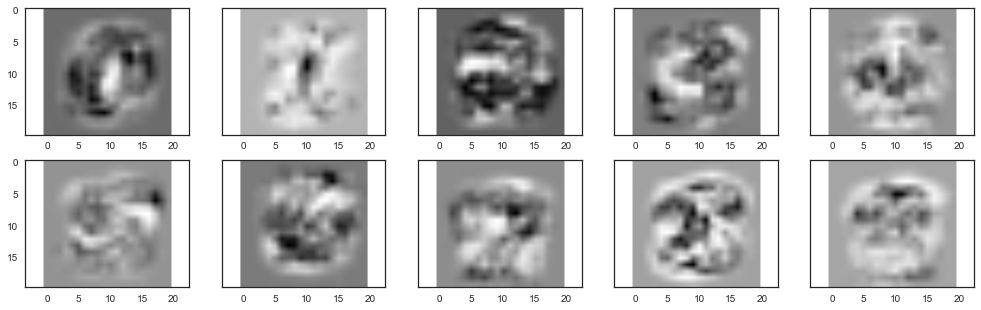

In [97]:
#plot the weights
fig, axes = plt.subplots(2,5, sharey = True, figsize=(17,5))
for k in range(K):
    axes.flatten()[k].imshow(meta_theta[k,1:].reshape(-1,20).T)

In [ ]:
# several notes:
#1. for optimal minimal, the searching variable could not 
#   be an nd array, but a list made of np.zeros((n,1))
#2. not clear how to use dot, use reshape(-1,1) to make a column vector

In [105]:
a=np.zeros((3,4))
b=np.zeros((4,1)).flatten()
c=a.dot(b)
np.shape(c)

(3,)